In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import random

# Iris Classification with KNN 

In [2]:
df = pd.read_excel('Iris.xls')

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Pre-processing

In [4]:
df_labels = df['iris']
labels = df_labels.values

In [5]:
# convert labels to numbers
labels_num = []

for i in labels:
    if i == 'Iris-setosa':
        labels_num.append(1)
    elif i == 'Iris-versicolor':
        labels_num.append(2)
    else:
        labels_num.append(3)

df_labels_num = pd.DataFrame(labels_num)

In [6]:
df['iris'] = df_labels_num 
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Shuffle Data

In [7]:
index = [i for i in range(df.shape[0])]
random.shuffle(index)
df = df.set_index([index]).sort_index()
df = df.iloc[:-10]
df_unknown = df.iloc[-10:]

In [8]:
df_unknown

,sepal length,sepal width,petal length,petal width,iris
130,7.2,3.6,6.1,2.5,3
131,5.1,3.7,1.5,0.4,1
132,5.0,3.5,1.3,0.3,1
133,4.6,3.1,1.5,0.2,1
134,6.7,3.1,4.4,1.4,2
135,6.9,3.1,5.4,2.1,3
136,4.9,3.1,1.5,0.1,1
137,6.1,2.9,4.7,1.4,2
138,6.3,2.8,5.1,1.5,3
139,5.7,2.8,4.1,1.3,2


# Plotting Data (couldn't get petal width)

In [9]:
X = df['sepal length'].values
X2 = df['sepal width'].values
X3 = df['petal length'].values

label = df['iris'].values
colors = ['red', 'green', 'blue']

red = Iris-setosa
green = Iris-versicolor
blue = Iris virginica

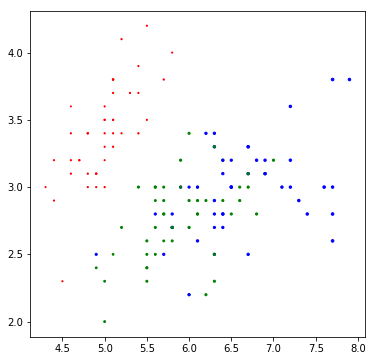

In [10]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(X, X2, X3, c=label, 
            cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

# Finding Euclidean Distance

In [11]:
distances_and_classes = []

for i in range(len(df_unknown.values)):
     
    a = []

    for j in range(len(df.values)):
        euc_dis = np.sqrt((df.values[j,0] - df_unknown.values[i,0])**2 + 
                          (df.values[j,1] - df_unknown.values[i,1])**2 + 
                          (df.values[j,2] - df_unknown.values[i,2])**2 + 
                          (df.values[j,3] - df_unknown.values[i,3])**2)

        a.append([round(euc_dis,2), df.values[j,4]])
        
    distances_and_classes.append(a)

In [12]:
distances_and_classes

[[[1.89, 3.0],
  [3.17, 2.0],
  [5.58, 1.0],
  [1.43, 3.0],
  [5.75, 1.0],
  [0.81, 3.0],
  [2.41, 2.0],
  [2.11, 2.0],
  [5.65, 1.0],
  [5.68, 1.0],
  [3.3, 2.0],
  [1.12, 3.0],
  [5.28, 1.0],
  [2.62, 2.0],
  [5.6, 1.0],
  [1.38, 3.0],
  [3.23, 2.0],
  [2.61, 2.0],
  [1.88, 3.0],
  [0.81, 3.0],
  [0.86, 3.0],
  [2.01, 2.0],
  [1.27, 3.0],
  [5.15, 1.0],
  [5.64, 1.0],
  [0.81, 3.0],
  [0.93, 3.0],
  [2.24, 2.0],
  [2.22, 3.0],
  [2.13, 2.0],
  [0.71, 3.0],
  [5.52, 1.0],
  [5.81, 1.0],
  [2.35, 2.0],
  [6.07, 1.0],
  [2.81, 2.0],
  [1.67, 2.0],
  [2.9, 2.0],
  [5.48, 1.0],
  [1.87, 3.0],
  [5.7, 1.0],
  [5.61, 1.0],
  [6.29, 1.0],
  [5.53, 1.0],
  [5.98, 1.0],
  [1.92, 2.0],
  [1.43, 3.0],
  [1.02, 3.0],
  [5.55, 1.0],
  [1.17, 3.0],
  [1.01, 3.0],
  [1.32, 3.0],
  [6.03, 1.0],
  [3.11, 3.0],
  [1.25, 3.0],
  [2.03, 3.0],
  [2.2, 2.0],
  [1.88, 3.0],
  [2.03, 3.0],
  [2.77, 2.0],
  [2.34, 2.0],
  [2.58, 2.0],
  [5.61, 1.0],
  [0.63, 3.0],
  [5.89, 1.0],
  [2.01, 2.0],
  [3.0, 2.0],
 

# Finding Closest  Class

In [13]:
sorted_distances_and_classes = [] # sorted from least to greatest distance
                                  # [distance, class number]
    
for i in distances_and_classes:
    new_list = sorted(i, key=lambda x: x[0])
    sorted_distances_and_classes.append(new_list)

In [14]:
sorted_distances_and_classes

[[[0.0, 3.0],
  [0.63, 3.0],
  [0.67, 3.0],
  [0.71, 3.0],
  [0.75, 3.0],
  [0.81, 3.0],
  [0.81, 3.0],
  [0.81, 3.0],
  [0.86, 3.0],
  [0.87, 3.0],
  [0.93, 3.0],
  [0.95, 3.0],
  [0.96, 3.0],
  [0.99, 3.0],
  [1.01, 3.0],
  [1.01, 3.0],
  [1.02, 3.0],
  [1.05, 3.0],
  [1.12, 3.0],
  [1.17, 3.0],
  [1.22, 3.0],
  [1.22, 3.0],
  [1.25, 3.0],
  [1.27, 3.0],
  [1.3, 3.0],
  [1.3, 3.0],
  [1.32, 3.0],
  [1.38, 3.0],
  [1.38, 3.0],
  [1.39, 3.0],
  [1.43, 3.0],
  [1.43, 3.0],
  [1.57, 2.0],
  [1.57, 3.0],
  [1.67, 2.0],
  [1.84, 2.0],
  [1.86, 2.0],
  [1.86, 3.0],
  [1.87, 3.0],
  [1.88, 3.0],
  [1.88, 3.0],
  [1.89, 3.0],
  [1.9, 3.0],
  [1.92, 2.0],
  [1.92, 3.0],
  [1.92, 2.0],
  [1.99, 3.0],
  [2.01, 2.0],
  [2.01, 2.0],
  [2.03, 3.0],
  [2.03, 3.0],
  [2.09, 2.0],
  [2.09, 2.0],
  [2.11, 2.0],
  [2.13, 2.0],
  [2.14, 2.0],
  [2.2, 2.0],
  [2.2, 2.0],
  [2.21, 3.0],
  [2.21, 2.0],
  [2.22, 3.0],
  [2.24, 2.0],
  [2.34, 2.0],
  [2.35, 2.0],
  [2.37, 3.0],
  [2.41, 2.0],
  [2.48, 2.0],
 

In [15]:
top_3_distances_and_classes = [] # 3 least distances

for i in sorted_distances_and_classes:
    top_3 = []
    
    for j in range(3):
        top_3.append(i[j])
        
    top_3_distances_and_classes.append(top_3)

In [16]:
top_3_distances_and_classes
# [distance, class number]

[[[0.0, 3.0], [0.63, 3.0], [0.67, 3.0]],
 [[0.0, 1.0], [0.14, 1.0], [0.24, 1.0]],
 [[0.0, 1.0], [0.14, 1.0], [0.17, 1.0]],
 [[0.0, 1.0], [0.14, 1.0], [0.17, 1.0]],
 [[0.0, 2.0], [0.14, 2.0], [0.32, 2.0]],
 [[0.0, 3.0], [0.36, 3.0], [0.37, 3.0]],
 [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]],
 [[0.0, 2.0], [0.14, 2.0], [0.22, 2.0]],
 [[0.0, 3.0], [0.33, 2.0], [0.36, 2.0]],
 [[0.0, 2.0], [0.14, 2.0], [0.17, 2.0]]]

In [17]:
df_unknown 
# iris is class number

,sepal length,sepal width,petal length,petal width,iris
130,7.2,3.6,6.1,2.5,3
131,5.1,3.7,1.5,0.4,1
132,5.0,3.5,1.3,0.3,1
133,4.6,3.1,1.5,0.2,1
134,6.7,3.1,4.4,1.4,2
135,6.9,3.1,5.4,2.1,3
136,4.9,3.1,1.5,0.1,1
137,6.1,2.9,4.7,1.4,2
138,6.3,2.8,5.1,1.5,3
139,5.7,2.8,4.1,1.3,2
